In [3]:
from queue import PriorityQueue
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def find(parent, i):
    if parent[i] == i:
        return i
    return find(parent, parent[i])

def union(parent, rank, x, y):
    x_root = find(parent, x)
    y_root = find(parent, y)
    if rank[x_root] < rank[y_root]:
        parent[x_root] = y_root
    elif rank[x_root] > rank[y_root]:
        parent[y_root] = x_root
    else:
        parent[y_root] = x_root
        rank[x_root] += 1

def kruskal_mst(graph):
    edges = []
    for u, v, d in graph.edges(data=True):
        edges.append((u, v, d['weight']))
    edges.sort(key=lambda x: x[2])  # Sort edges by weight in ascending order

    parent = {i: i for i in graph.nodes()}
    rank = {i: 0 for i in graph.nodes()}
    mst_edges = set()

    for u, v, weight in edges:
        u_root = find(parent, u)
        v_root = find(parent, v)

        if u_root != v_root:
            mst_edges.add((u, v))
            union(parent, rank, u_root, v_root)

    return mst_edges

def draw_graph(graph, figsize=(10, 10), node_size=800, grid=False):
    mst_edges = kruskal_mst(graph)
    other_edges = set(graph.edges()).difference(mst_edges)
    
    plt.figure(figsize=figsize)
    plt.axis('off')

    if grid:
        pos = nx.spring_layout(graph)
    else:
        pos = nx.circular_layout(graph)

    # Edges
    nx.draw_networkx_edges(graph, pos, edgelist=mst_edges, width=4, edge_color='r')
    nx.draw_networkx_edges(graph, pos, edgelist=other_edges)
    
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels, font_size=10)

    nx.draw_networkx(graph, pos, node_size=node_size, font_color='white', node_color='steelblue')

def assign_random_weights(graph):
    for u, v, d in graph.edges(data=True):
        d['weight'] = np.random.randint(20)
        
    return graph

def assign_unit_weights(graph):
    for u, v, d in graph.edges(data=True):
        d['weight'] = 1
        
    return graph


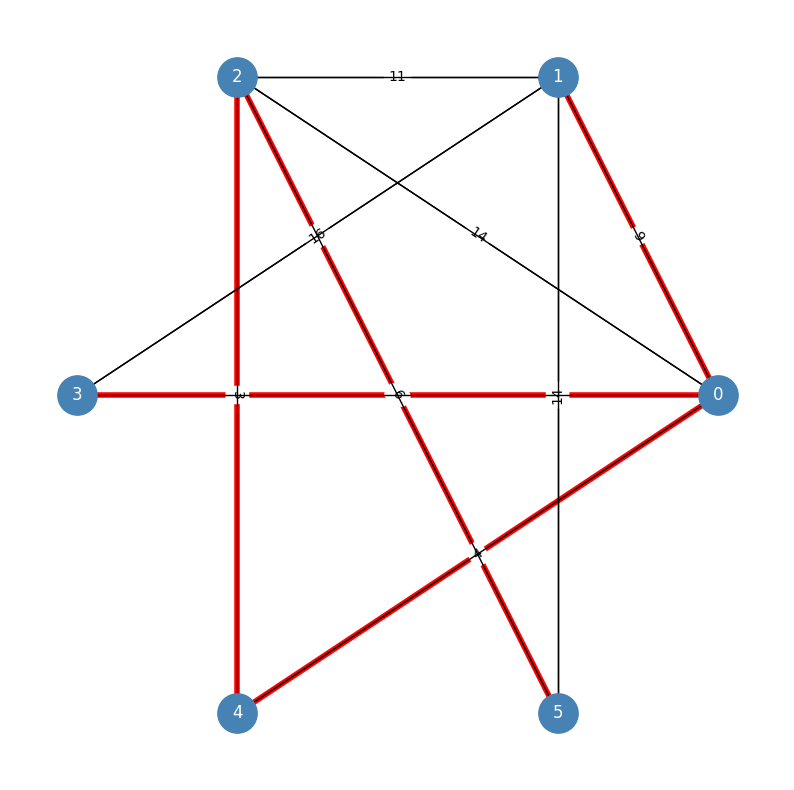

In [4]:
graph = assign_random_weights(nx.dorogovtsev_goltsev_mendes_graph(2))

draw_graph(graph)

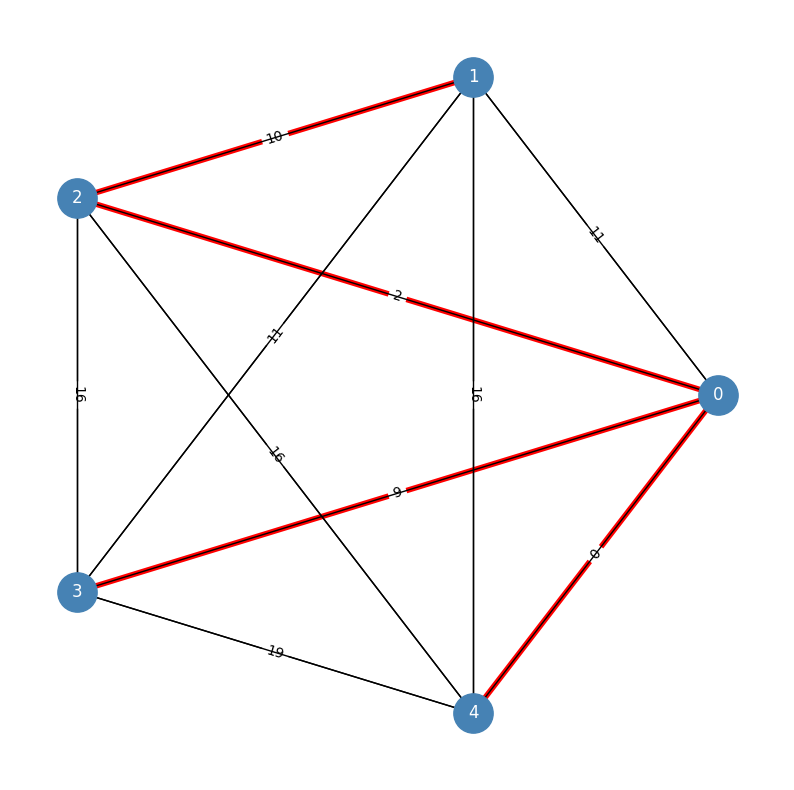

In [5]:
graph = assign_random_weights(nx.complete_graph(5))

draw_graph(graph)